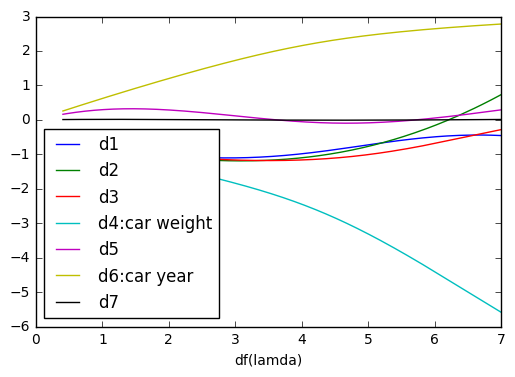

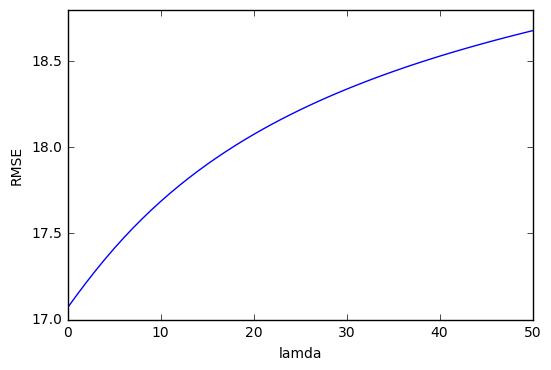

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sl
import csv
import math

identity = np.identity(7)
with open('X_train.csv', 'rb') as xtrain:
    reader1 = csv.reader(xtrain)
    x = list(reader1)
with open('y_train.csv', 'rb') as ytrain:
    reader2 = csv.reader(ytrain)
    y = list(reader2)

with open('X_test.csv', 'rb') as xtest:
    reader3 = csv.reader(xtest)
    x_test = list(reader3)
with open('y_test.csv', 'rb') as ytest:
    reader4 = csv.reader(ytest)
    y_test = list(reader4)

for row in range(len(x_test)):
    for elem in range(len(x_test[0])):
        x_test[row][elem] = float(x_test[row][elem])

for row in range(len(y_test)):
    y_test[row][0] = float(y_test[row][0])

for row in range(len(x)):
    for elem in range(len(x[0])):
        x[row][elem] = float(x[row][elem])

for row in range(len(y)):
    y[row][0] = float(y[row][0])


graph = []

x_t = np.transpose(x)

u, s, v_t = np.linalg.svd(x)

#calculate data for plot

def df_lamda(lamda):
    dflamda = 0
    for i in range(7):
        dflamda += (s[i]**2)/(lamda + s[i]**2)
    return dflamda


feature = [[] for i in range(7)]
df_list = []
for lamda in range(5001):
    
    wrr_p1 = np.linalg.inv(lamda*identity + np.dot(x_t, x))
    wrr = np.dot(np.dot(wrr_p1, x_t), y)
    for i in range(7):
        feature[i].append(wrr[i])
    df_list.append(df_lamda(lamda))
    
#plot the figure 1
plt.figure(1)
fig, ax = plt.subplots()

ax.plot(df_list, feature[0], label = 'd1')
ax.plot(df_list, feature[1], label = 'd2')
ax.plot(df_list, feature[2], label = 'd3')
ax.plot(df_list, feature[3], label = 'd4:car weight')
ax.plot(df_list, feature[4], label = 'd5')
ax.plot(df_list, feature[5], label = 'd6:car year')
ax.plot(df_list, feature[6], label = 'd7')

ax.legend(loc = 3)
ax.set_xlabel('df(lamda)')

plt.show()

rmse = []


#plot figure 2
for lamda in range(51):
    wrr_p1 = np.linalg.inv(lamda*identity + np.dot(x_t, x))
    wrr = np.dot(np.dot(wrr_p1, x_t), y)
    error = y_test - np.dot(x_test, wrr)
    rmse.append(math.sqrt(np.dot(np.transpose(error), error)))


plt.figure(2)
plt.plot(range(51), rmse)
plt.xlabel('lamda')
plt.ylabel('RMSE')

plt.show()




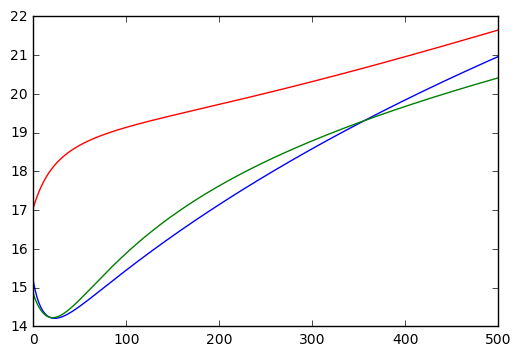

In [27]:
#plot figure 3
identity2 = np.identity(13)
traintemp = np.delete(x, 6, 1)
x_p2 = np.column_stack((x, np.square(traintemp)))
x_p2_t = np.transpose(x_p2)
testtemp = np.delete(x_test, 6, 1)
x_p2_test = np.column_stack((x_test, np.square(testtemp)))

rmse = []
for lamda in range(501):
    wrr_p1 = np.linalg.inv(lamda*identity + np.dot(x_t, x))
    wrr = np.dot(np.dot(wrr_p1, x_t), y)
    error = y_test - np.dot(x_test, wrr)
    rmse.append(math.sqrt(np.dot(np.transpose(error), error)))

rmse2 = []
for lamda in range(501):
    wrr_p1 = np.linalg.inv(lamda*identity2 + np.dot(x_p2_t, x_p2))
    wrr = np.dot(np.dot(wrr_p1, x_p2_t), y)
    error = y_test - np.dot(x_p2_test, wrr)
    rmse2.append(math.sqrt(np.dot(np.transpose(error), error)))
    

    
identity3 = np.identity(19)

x_p3 = np.column_stack((x, np.square(traintemp),traintemp ** 3))
x_p3_t = np.transpose(x_p3)
x_p3_test = np.column_stack((x_test, np.square(testtemp), testtemp ** 3))

rmse3 = []
for lamda in range(501):
    wrr_p1 = np.linalg.inv(lamda*identity3 + np.dot(x_p3_t, x_p3))
    wrr = np.dot(np.dot(wrr_p1, x_p3_t), y)
    error = y_test - np.dot(x_p3_test, wrr)
    rmse3.append(math.sqrt(np.dot(np.transpose(error), error)))

plt.figure(3)
fig, ax = plt.subplots()
ax.plot(range(501), rmse, color = 'r')
ax.plot(range(501), rmse2, color = 'b')
ax.plot(range(501), rmse3, color = 'g')
plt.show()